In [1]:
from datacube import Datacube
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.gridspec as gridspec

cdc = Datacube(config='/g/data/u46/users/ext547/ewater/cambodia_cube/cambodia.conf')

In [2]:
#Define function to create subplots of all scenes within an array as subplots
def one_band_image_subplots(ds, num_cols, figsize = [10,40], left  = 0.125, 
                              right = 0.9, bottom = 0.1, top = 0.9, 
                              wspace = 0.2, hspace = 0.4):
    '''
    one_band_image_subplots takes a dataset with one band and multiple time steps, 
    and plots them in image. 
    Last modified: March 2018
    Author: Mike Barnes
    Modified by: Claire Krause and Erin Telfer
    
    Inputs: 
    ds -   Dataset containing the bands to be plotted
    num_cols - number of columns for the subplot
    
    Optional:
    figsize - dimensions for the output figure
    left  - the space on the left side of the subplots of the figure
    right - the space on the right side of the subplots of the figure
    bottom - the space on the bottom of the subplots of the figure
    top - the space on the top of the subplots of the figure
    wspace - the amount of width reserved for blank space between subplots
    hspace - the amount of height reserved for white space between subplots
    '''
    # Find the number of rows/columns we need, based on the number of time steps in ds
    fig = plt.figure(figsize = figsize)
    timesteps = ds.time.size
    num_rows = int(np.ceil(timesteps/num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize = figsize)
    fig.subplots_adjust(left  = left, right = right, bottom = bottom, top = top, 
                        wspace = wspace, hspace = hspace)
    try: #loop through all scenes, prepare imagery and create subplots
        for i, ax in enumerate(fig.axes):
            image_ds = ds.rainfall.isel(time =i)
            ax.set_title(str(image_ds.time.values)[0:10])
            ax.imshow(image_ds, interpolation = 'nearest') #plot image as subplot
    except IndexError: #if there are an odd number of plots, this code will allow plotting of images
        fig.delaxes(ax)
        plt.draw() 

In [3]:
# #define temporal range ()
# start_of_epoch = '1979-01-01'
# end_of_epoch =  '1980-01-01'

# query = {'time': (start_of_epoch, end_of_epoch),}

# lat_min = 13.5 #down
# lat_max = 22.5 #up
# lon_min = 99.5 #left
# lon_max = 108.0 #right 

lat_min = 13.10 #down
lat_max = 13.60 #up
lon_min = 103.65 #left
lon_max = 104.15 #right 

# query['x'] = (lon_min, lon_max)
# query['y'] = (lat_max, lat_min)
# query['crs'] = 'EPSG:4326'

# print(query)

In [4]:
#cc_product = 'rainfall_grids_1998_2017'
cc_product = 'alos_sar_mosaic'
#cc_product = 'temperature_grids_1979_2016'

In [5]:
#define temporal range ()
start_of_epoch = '2007-01-01'
end_of_epoch =  '2008-01-01'

query = {'time': (start_of_epoch, end_of_epoch),}

query['x'] = (lon_min, lon_max)
query['y'] = (lat_max, lat_min)
query['crs'] = 'EPSG:4326'

print(query)

ds07= cdc.load(product=cc_product,**query)
print(ds07)

{'time': ('2007-01-01', '2008-01-01'), 'x': (103.65, 104.15), 'y': (13.6, 13.1), 'crs': 'EPSG:4326'}
<xarray.Dataset>
Dimensions:    (latitude: 2251, longitude: 2250, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2007-01-01
  * latitude   (latitude) float64 13.6 13.6 13.6 13.6 ... 13.1 13.1 13.1 13.1
  * longitude  (longitude) float64 103.7 103.7 103.7 103.7 ... 104.1 104.1 104.1
Data variables:
    hh         (time, latitude, longitude) uint16 5142 4704 3315 ... 9922 9922
    hv         (time, latitude, longitude) uint16 1313 1760 1327 ... 6135 6135
Attributes:
    crs:      EPSG:4326


In [6]:
rb_07 = ds07.where(ds07>0,0.001)
rb_07 = 10 * np.log10(np.sqrt(rb_07)) - 83.0
db_07 = rb_07
db_07['ratio'] = rb_07.hh / rb_07.hv
db_07['hh'] = rb_07.hh + abs(rb_07.hh.min())+1
db_07['hv'] = rb_07.hv + abs(rb_07.hv.min())+1
db_07['ratio'] = rb_07.ratio + abs(rb_07.ratio.min())+1
db_07

<xarray.Dataset>
Dimensions:    (latitude: 2251, longitude: 2250, time: 1)
Coordinates:
  * latitude   (latitude) float64 13.6 13.6 13.6 13.6 ... 13.1 13.1 13.1 13.1
  * time       (time) datetime64[ns] 2007-01-01
  * longitude  (longitude) float64 103.7 103.7 103.7 103.7 ... 104.1 104.1 104.1
Data variables:
    hh         (time, latitude, longitude) float64 34.56 34.36 ... 35.98 35.98
    hv         (time, latitude, longitude) float64 5.043 5.679 ... 8.391 8.391
    ratio      (time, latitude, longitude) float64 2.853 2.865 ... 2.881 2.881

In [7]:
#define temporal range ()
start_of_epoch = '2016-01-01'
end_of_epoch =  '2018-01-01'

query = {'time': (start_of_epoch, end_of_epoch),}

query['x'] = (lon_min, lon_max)
query['y'] = (lat_max, lat_min)
query['crs'] = 'EPSG:4326'

print(query)

ds17= cdc.load(product=cc_product,**query)
print(ds17)

{'time': ('2016-01-01', '2018-01-01'), 'x': (103.65, 104.15), 'y': (13.6, 13.1), 'crs': 'EPSG:4326'}
<xarray.Dataset>
Dimensions:    (latitude: 2251, longitude: 2250, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01
  * latitude   (latitude) float64 13.6 13.6 13.6 13.6 ... 13.1 13.1 13.1 13.1
  * longitude  (longitude) float64 103.7 103.7 103.7 103.7 ... 104.1 104.1 104.1
Data variables:
    hh         (time, latitude, longitude) uint16 4374 2647 2585 ... 5150 2167
    hv         (time, latitude, longitude) uint16 1407 814 844 ... 893 2843 823
Attributes:
    crs:      EPSG:4326


In [8]:
rb_17 = ds17.where(ds17>0,0.001)
rb_17 = 10 * np.log10(np.sqrt(rb_17)) - 83.0
db_17 = rb_17
db_17['ratio'] = rb_17.hh / rb_17.hv
db_17['hh'] = rb_17.hh + abs(rb_17.hh.min())+1
db_17['hv'] = rb_17.hv + abs(rb_17.hv.min())+1
db_17['ratio'] = rb_17.ratio + abs(rb_17.ratio.min())+1

rb_17

<xarray.Dataset>
Dimensions:    (latitude: 2251, longitude: 2250, time: 1)
Coordinates:
  * latitude   (latitude) float64 13.6 13.6 13.6 13.6 ... 13.1 13.1 13.1 13.1
  * time       (time) datetime64[ns] 2017-01-01
  * longitude  (longitude) float64 103.7 103.7 103.7 103.7 ... 104.1 104.1 104.1
Data variables:
    hh         (time, latitude, longitude) float64 34.2 33.11 ... 34.56 32.68
    hv         (time, latitude, longitude) float64 7.745 6.556 ... 9.272 6.58
    ratio      (time, latitude, longitude) float64 2.842 2.841 ... 2.858 2.847

In [10]:
#Set up the WOfS colour ramp and corresponding thresholds
hv_cmap = mpl.colors.ListedColormap(['navy','teal','green','olive','yellow','orange', 'red','maroon'])

#                                       (['blue', 'green', 'yellow', 
#                                       'orange', 'purple', 'red',]) 
#                                       '#46f0f0', '#f032e6', '#bcf60c', 
#                                       '#fabebe', '#008080', '#e6beff', 
#                                       '#9a6324', '#fffac8', '#800000', 
#                                       '#aaffc3', '#808000', '#ffd8b1', 
#                                       '#000075', '#808080', '#ffffff',])
                                      #'#000000'])##User should format as required
hv_bounds = [0, 500,1000,2000, 4000, 6000,8000,10_000,50_000]# [0, 500, 1000, 3000,5000, 70_000]

    # rad_bounds = list(range(0,65000,4000))
hv_norm = mpl.colors.BoundaryNorm(hv_bounds, hv_cmap.N)

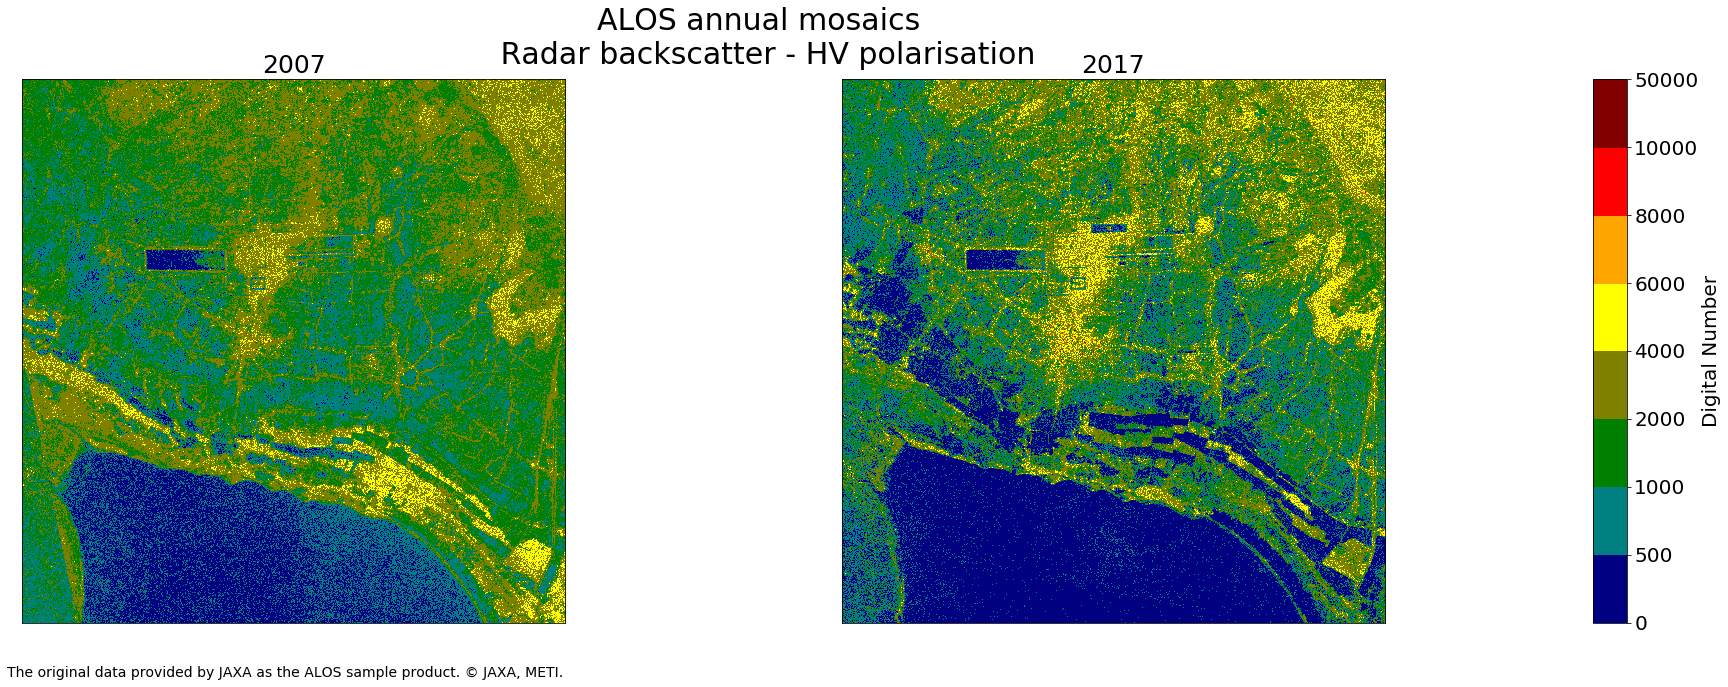

In [15]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

fig, (ax, ax2, cax) = plt.subplots(ncols=3,figsize=(30,10), 
                  gridspec_kw={"width_ratios":[1,1, 0.05]},)
fig.subplots_adjust(wspace=0.3)
fig.suptitle("ALOS annual mosaics \n Radar backscatter - HV polarisation", fontsize=30)
fig.text(0.15,0.05,'The original data provided by JAXA as the ALOS sample product. © JAXA, METI.',fontsize = 14)

im  = ax.imshow(ds07.hv.isel(time=0),hv_cmap, norm = hv_norm)
ax.set_title('2007', fontsize = 25)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


im2 = ax2.imshow(ds17.hv.isel(time=0), hv_cmap, norm = hv_norm)
ax2.set_title('2017', fontsize = 25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)


# ip = InsetPosition(ax2, [1.05,0,0.05,1]) 
ip = InsetPosition(ax2, [1.05,0,0.05,1]) 
cax.set_axes_locator(ip)

fig.colorbar(im, cax=cax, ax=[ax,ax2],).set_label('Digital Number', size = 20)
cax.tick_params(labelsize=20)

plt.savefig('/g/data/u46/users/ext547/ewater/output_data/image_dump/ALOS_HV.jpg')
plt.show()


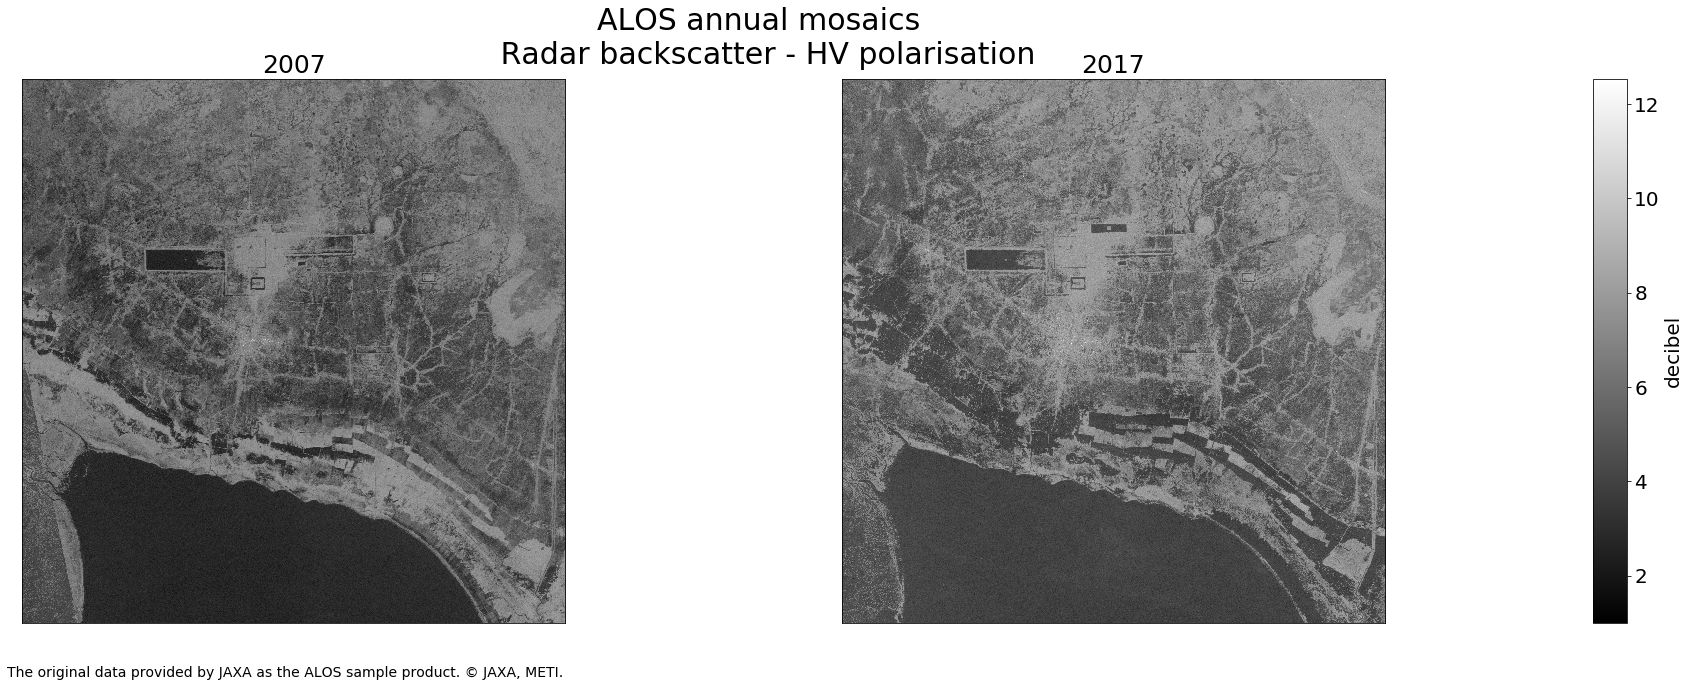

In [16]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

fig, (ax, ax2, cax) = plt.subplots(ncols=3,figsize=(30,10), 
                  gridspec_kw={"width_ratios":[1,1, 0.05]},)
fig.subplots_adjust(wspace=0.3)
fig.suptitle("ALOS annual mosaics \n Radar backscatter - HV polarisation", fontsize=30)
fig.text(0.15,0.05,'The original data provided by JAXA as the ALOS sample product. © JAXA, METI.',fontsize = 14)

im  = ax.imshow(rb_07.hv.isel(time=0),cmap = 'gray')
ax.set_title('2007', fontsize = 25)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


im2 = ax2.imshow(rb_17.hv.isel(time=0),cmap = 'gray')
ax2.set_title('2017', fontsize = 25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)


ip = InsetPosition(ax2, [1.05,0,0.05,1]) 
cax.set_axes_locator(ip)

fig.colorbar(im, cax=cax, ax=[ax,ax2],).set_label('decibel', size = 20)
cax.tick_params(labelsize=20)

plt.savefig('/g/data/u46/users/ext547/ewater/output_data/image_dump/ALOS_HV_db.jpg')
plt.show()


In [14]:
# #Set up the WOfS colour ramp and corresponding thresholds
# hh_cmap = mpl.colors.ListedColormap(['navy','blue','teal','aqua', 'green', 'yellow', 
#                                       'orange', 'purple', 'red',
#                                       '#46f0f0', '#f032e6', 'black'])
# #                                       '#9a6324', '#fffac8', '#800000', 
# #                                       '#aaffc3', '#808000', '#ffd8b1', 
# #                                       '#000075', '#808080', '#ffffff',])
#                                       #'#000000'])##User should format as required
# hh_bounds = [0, 1000, 2000, 3000,4000,5000,10_000,20_000,30_000,40_000,50_000,60_000, 70_000]
#     # rad_bounds = list(range(0,65000,4000))
# hh_norm = mpl.colors.BoundaryNorm(hh_bounds, hh_cmap.N)

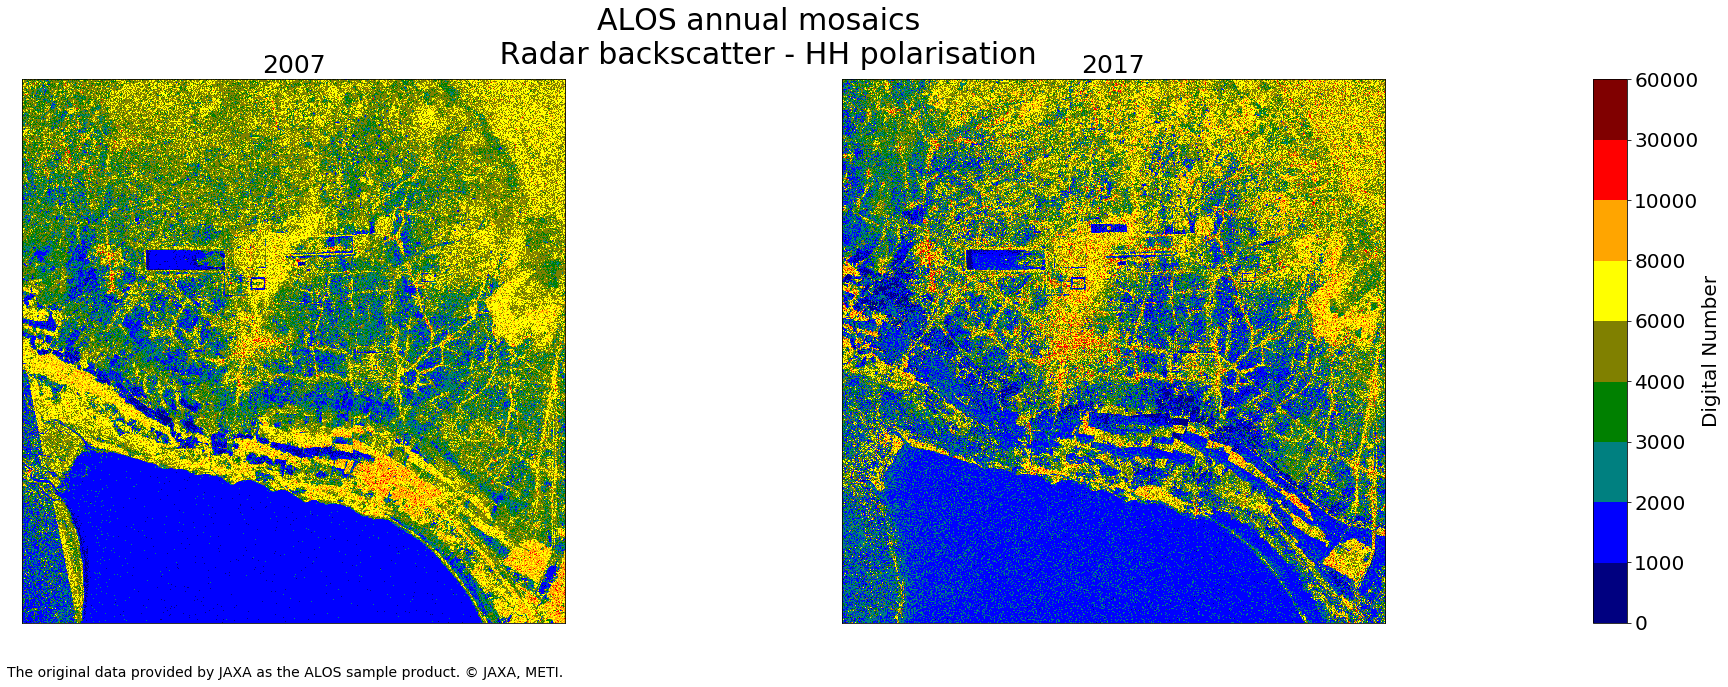

In [19]:
#Set up the WOfS colour ramp and corresponding thresholds
hh_cmap = mpl.colors.ListedColormap(['navy','blue','teal','green','olive','yellow','orange', 'red','maroon'])
#                                       '#9a6324', '#fffac8', '#800000', 
#                                       '#aaffc3', '#808000', '#ffd8b1', 
#                                       '#000075', '#808080', '#ffffff',])
                                      #'#000000'])##User should format as required
hh_bounds = [0, 1000,2000,3000,4000, 6000,8000,10_000,30_000,60_000]
    # rad_bounds = list(range(0,65000,4000))
hh_norm = mpl.colors.BoundaryNorm(hh_bounds, hh_cmap.N)


import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

fig, (ax, ax2, cax) = plt.subplots(ncols=3,figsize=(30,10), 
                  gridspec_kw={"width_ratios":[1,1, 0.05]},)
fig.subplots_adjust(wspace=0.3)
fig.suptitle("ALOS annual mosaics \n Radar backscatter - HH polarisation", fontsize=30)
fig.text(0.15,0.05,'The original data provided by JAXA as the ALOS sample product. © JAXA, METI.',fontsize = 14)
# plt.annotate('The original data are provided by JAXA as the ALOS sample product. © JAXA, METI.', (0,0))



im  = ax.imshow(ds07.hh.isel(time=0),cmap = hh_cmap, norm = hh_norm)

ax.set_title('2007', fontsize = 25)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


im2 = ax2.imshow(ds17.hh.isel(time=0),cmap = hh_cmap, norm = hh_norm)
ax2.set_title('2017', fontsize = 25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)


ip = InsetPosition(ax2, [1.05,0,0.05,1]) 
cax.set_axes_locator(ip)

fig.colorbar(im, cax=cax, ax=[ax,ax2],).set_label('Digital Number', size = 20)
cax.tick_params(labelsize=20) 


plt.savefig('/g/data/u46/users/ext547/ewater/output_data/image_dump/ALOS_HH.jpg')

plt.show()

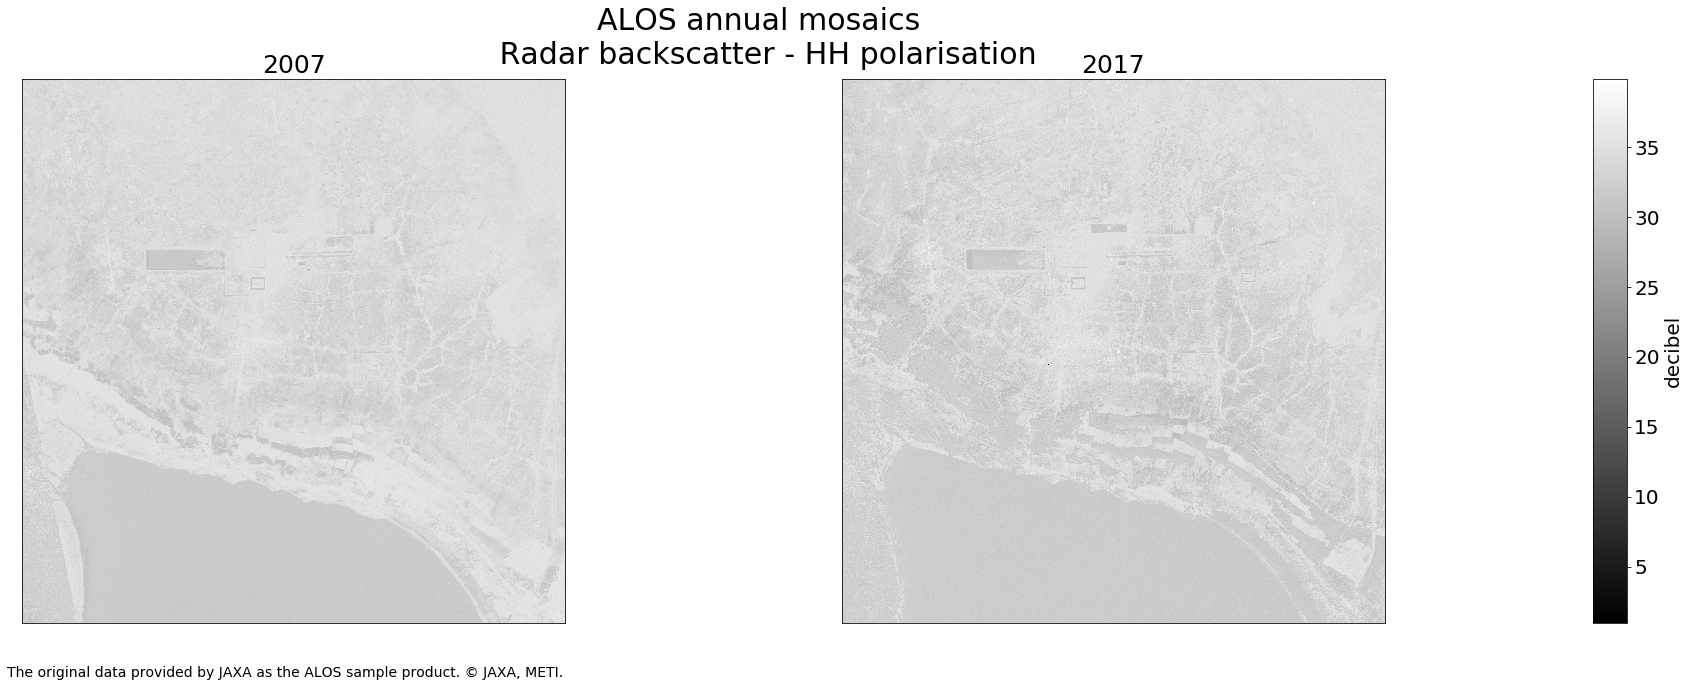

In [20]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

fig, (ax, ax2, cax) = plt.subplots(ncols=3,figsize=(30,10), 
                  gridspec_kw={"width_ratios":[1,1, 0.05]},)
fig.subplots_adjust(wspace=0.3)
fig.suptitle("ALOS annual mosaics \n Radar backscatter - HH polarisation", fontsize=30)
fig.text(0.15,0.05,'The original data provided by JAXA as the ALOS sample product. © JAXA, METI.',fontsize = 14)
# plt.annotate('The original data are provided by JAXA as the ALOS sample product. © JAXA, METI.', (0,0))



#im  = ax.imshow(ds07.hh.isel(time=0),cmap = hh_cmap, norm = hh_norm)
im  = ax.imshow(rb_07.hh.isel(time=0),cmap = 'gray')#,hv_cmap, norm = hv_norm)

ax.set_title('2007', fontsize = 25)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


# im2 = ax2.imshow(ds17.hh.isel(time=0),cmap = hh_cmap, norm = hh_norm)
im2 = ax2.imshow(rb_17.hh.isel(time=0),cmap = 'gray')#, norm = hv_norm)

ax2.set_title('2017', fontsize = 25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)


ip = InsetPosition(ax2, [1.05,0,0.05,1]) 
cax.set_axes_locator(ip)

fig.colorbar(im, cax=cax, ax=[ax,ax2],).set_label('decibel', size = 20)
cax.tick_params(labelsize=20) 


plt.savefig('/g/data/u46/users/ext547/ewater/output_data/image_dump/ALOS_HH_db.jpg')

plt.show()

In [21]:
rb17 = ds17.where(ds17>0,0.001)
rb17 = 10 * np.log10(np.sqrt(rb17)) - 83.0
rb_17['ratio'] = rb17.hh / rb17.hv
rb_17['hh'] = rb_17.hh + abs(rb_17.hh.min())+1
rb_17['hv'] = rb_17.hv + abs(rb_17.hv.min())+1
rb_17['ratio'] = rb_17.ratio + abs(rb_17.ratio.min())+1
rb_17.max()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    hh       float64 42.07
    hv       float64 17.76
    ratio    float64 3.532

In [22]:
rgb_07 = rb_07.isel(time = 0).to_array(dim='color').sel(color=['hh', 'hv', 'ratio']).transpose('latitude', 'longitude', 'color')
rgb_07 = rgb_07.astype('double')
max_val_07 = rgb_07.max(['latitude', 'longitude'])
scaled_07 = rgb_07 / max_val_07

rgb_17 = rb_17.isel(time = 0).to_array(dim='color').sel(color=['hh', 'hv', 'ratio']).transpose('latitude', 'longitude', 'color')
rgb_17 = rgb_17.astype('double')
max_val_17 = rgb_17.max(['latitude', 'longitude'])
scaled_17 = rgb_17 / max_val_17

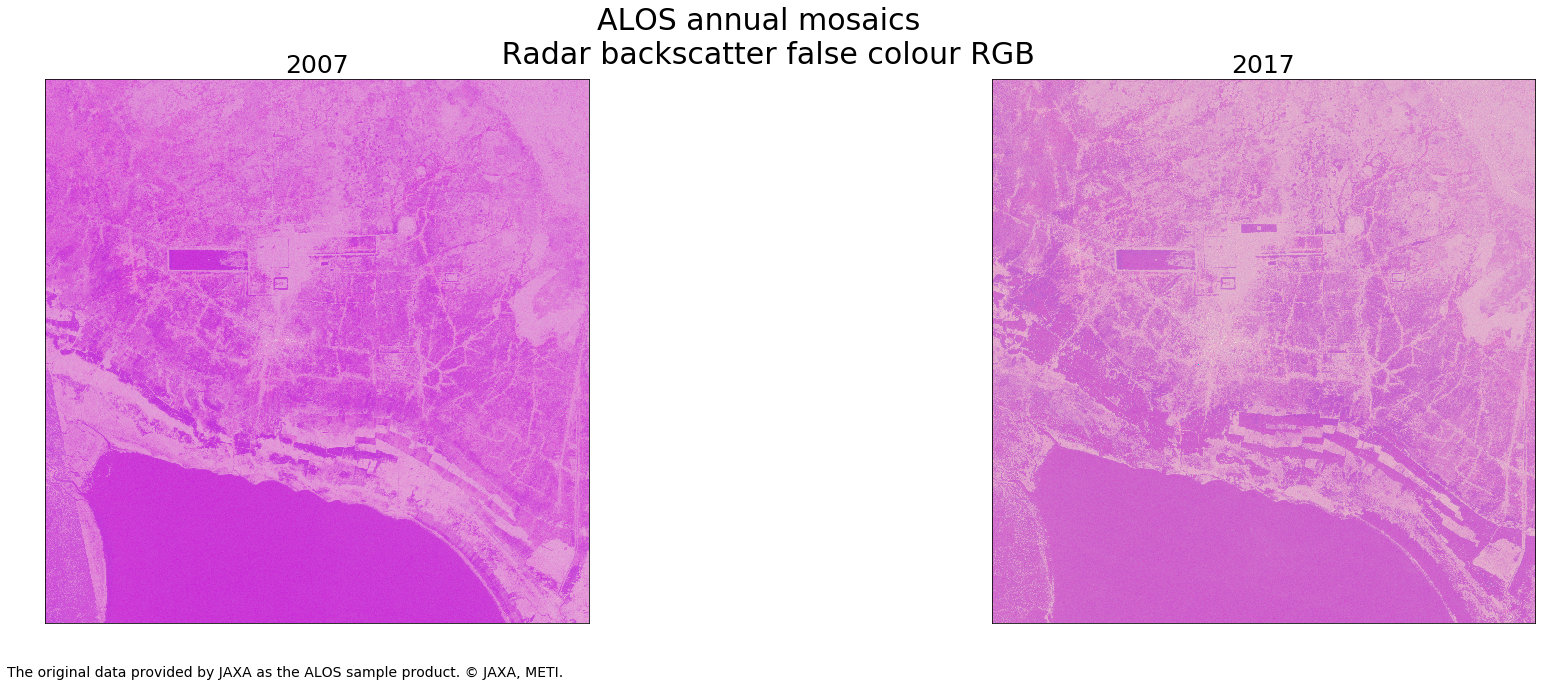

In [24]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

fig, (ax, ax2) = plt.subplots(ncols=2,figsize=(30,10), 
                  gridspec_kw={"width_ratios":[1,1]},)
fig.subplots_adjust(wspace=0.3)
fig.suptitle("ALOS annual mosaics \n Radar backscatter false colour RGB", fontsize=30)
fig.text(0.15,0.05,'The original data provided by JAXA as the ALOS sample product. © JAXA, METI.',fontsize = 14)

im  = ax.imshow(scaled_07)
ax.set_title('2007', fontsize = 25)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


im2 = ax2.imshow(scaled_17)
ax2.set_title('2017', fontsize = 25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)


# ip = InsetPosition(ax2, [1.05,0,0.05,1]) 
# ip = InsetPosition(ax2, [1.05,0,0.05,1]) 
# cax.set_axes_locator(ip)

# fig.colorbar(im, cax=cax, ax=[ax,ax2],).set_label('Digital Number', size = 20)
# cax.tick_params(labelsize=20)

plt.savefig('/g/data/u46/users/ext547/ewater/output_data/image_dump/ALOS_rgb.jpg')
plt.show()


In [ ]:
rb_17 = 10 * np.log10(ds17**2) - 83.0
rb_17['ratio'] = rb_17.hh / rb_17.hv
rb_17.hh.plot()

In [ ]:
rgb_17 = rb_17.isel(time = 0).to_array(dim='color').sel(color=['hv', 'hh', 'ratio']).transpose('latitude', 'longitude', 'color')

In [ ]:
i = plt.imshow(rgb_17, interpolation = 'nearest')
plt.colorbar(i)

In [ ]:
# fig=plt.figure(figsize=(30,10))
# plt.subplots_adjust(left=0.15, right=0.90, top=0.95, bottom=0.10) #Set border dimensions
# fig.patch.set_facecolor('white') #Make border is white
# fig.patch.set_alpha(0.99) #Ensure border is white
# gs = gridspec.GridSpec(1,3)


# ax4=plt.subplot(gs[0,0])
# d = ax4.imshow(ds07.hv.isel(time=0),cmap = hv_cmap, norm = hv_norm) #create image
# ax4.xaxis.set_visible(False)
# ax4.yaxis.set_visible(False)
# ax4.set_title('2007')
# #fig.colorbar(d,ax = ax4)

# ax5=plt.subplot(gs[0,1])
# e = ax5.imshow(ds17.hv.isel(time=0),cmap = hv_cmap, norm = hv_norm) #create image
# ax5.xaxis.set_visible(False)
# ax5.yaxis.set_visible(False)
# ax5.set_title('2017')

# ax6=plt.subplot(gs[0,2])

# fig.colorbar(e,ax = ax6)

# # ax6=plt.subplot(gs[0,2])
# # hv_difference = ((((ds07.hv.isel(time=0))-(ds17.hv.isel(time=0)))/ds07.hv.isel(time=0)))
# # f = ax6.imshow(hv_difference.values, vmax = 100, vmin = 0) #create image
# # ax6.xaxis.set_visible(False)
# # ax6.yaxis.set_visible(False)
# # fig.colorbar(f,ax = ax6)

# #fig.delaxes(fig.axes[2])

In [ ]:
plt.subplot

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(left=0.15, right=0.90, top=0.95, bottom=0.10) #Set border dimensions
fig.patch.set_facecolor('white') #Make border is white
fig.patch.set_alpha(0.99) #Ensure border is white
gs = gridspec.GridSpec(2,3)

ax1=plt.subplot(gs[0,0])
a = ax1.imshow(ds07.hh.isel(time=0),cmap = hv_cmap, norm = hv_norm) #create image
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
fig.colorbar(a,ax = ax1)
ax1.get_label()
ax1.set_title('2007')

ax2=plt.subplot(gs[0,1])
b = ax2.imshow(ds17.hh.isel(time=0),cmap = hv_cmap, norm = hv_norm) #create image
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
fig.colorbar(b,ax = ax2)
ax2.set_title('2017')

ax3=plt.subplot(gs[0,2])
hh_difference = ((((ds17.hh.isel(time=0))-(ds07.hh.isel(time=0)))/ds17.hh.isel(time=0))*100)
c = ax3.imshow(hh_difference.values,vmax = 100, vmin = 0) #create image
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
fig.colorbar(c,ax = ax3)

ax4=plt.subplot(gs[1,0])
d = ax4.imshow(ds07.hv.isel(time=0),cmap = hv_cmap, norm = hv_norm) #create image
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)
fig.colorbar(d,ax = ax4)

ax5=plt.subplot(gs[1,1])
e = ax5.imshow(ds17.hv.isel(time=0),cmap = hv_cmap, norm = hv_norm) #create image
ax5.xaxis.set_visible(False)
ax5.yaxis.set_visible(False)
fig.colorbar(e,ax = ax5)

ax6=plt.subplot(gs[1,2])
hv_difference = ((((ds17.hv.isel(time=0))-(ds07.hv.isel(time=0)))/ds17.hv.isel(time=0))*100)
f = ax6.imshow(hv_difference.values, vmax = 100, vmin = 0) #create image
ax6.xaxis.set_visible(False)
ax6.yaxis.set_visible(False)
fig.colorbar(f,ax = ax6)

In [ ]:
plt.imshow(ds.hh.isel(time=0),cmap = rad_cmap, norm = rad_norm)
plt.colorbar()
plt.show()

In [ ]:
# ds_subset.hh.isel(time=0).plot()

In [ ]:
# blah = ds_subset.sum(dim='time').rainfall/3

In [ ]:
blah.plot()

In [ ]:
ds_subset.sum(dim='time').rainfall.plot()

In [ ]:
ds_subset.sum(dim='time').PET.plot()

In [ ]:
# ds_subset['temperature'] = ds_subset.temperature.where(ds_subset.temperature>-1000)

In [ ]:
ds_subset.rainfall.isel(time=1).plot()

In [ ]:
one_band_image_subplots(ds_subset, 4, figsize = [40,800], left  = 0.125, 
                              right = 0.9, bottom = 0.1, top = 0.9, 
                              wspace = 0.2, hspace = 0.4)